In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
calls = pd.read_csv('calls.csv')
customers = pd.read_csv('customers.csv')
reasons = pd.read_csv('reason.csv')
sentiment_stats = pd.read_csv('sentiment_statistics.csv')
test = pd.read_csv('test.csv')

In [4]:
print(calls.head())
print(customers.head())
print(reasons.head())
print(sentiment_stats.head()) 

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin...  
   customer_id      custom

In [5]:
# Merge datasets
calls_full = pd.merge(calls, customers, on='customer_id', how='left')
calls_full = pd.merge(calls_full, sentiment_stats, on='call_id', how='left')
calls_full = pd.merge(calls_full, reasons, on='call_id', how='left')

# Ensure date columns are properly formatted
calls_full['call_start_datetime'] = pd.to_datetime(calls_full['call_start_datetime'])
calls_full['call_end_datetime'] = pd.to_datetime(calls_full['call_end_datetime'])
calls_full['agent_assigned_datetime'] = pd.to_datetime(calls_full['agent_assigned_datetime'])

# Preview the merged dataset
print(calls_full.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71810 entries, 0 to 71809
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id_x               71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
 7   customer_name            71810 non-null  object        
 8   elite_level_code         46043 non-null  float64       
 9   agent_id_y               71810 non-null  int64         
 10  agent_tone               71593 non-null  object        
 11  customer_tone            71810 non-null  object        
 12  average_sentiment        71701 n

In [6]:
# Calculate the handle time (in seconds)
calls_full['handle_time'] = (calls_full['call_end_datetime'] - calls_full['agent_assigned_datetime']).dt.total_seconds()

# Calculate AHT (Average Handle Time)
aht = calls_full['handle_time'].mean()
print(f"Average Handle Time (AHT): {aht} seconds")


Average Handle Time (AHT): 697.0486004734717 seconds


In [8]:
print(calls_full.columns)


Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'customer_name', 'elite_level_code', 'agent_id_y', 'agent_tone',
       'customer_tone', 'average_sentiment', 'silence_percent_average',
       'primary_call_reason', 'handle_time'],
      dtype='object')


In [9]:
# Group by the correct column name and calculate the mean handle time (AHT) for each agent
aht_by_agent = calls_full.groupby('agent_id_x')['handle_time'].mean().reset_index()

# Rename the columns for better readability
aht_by_agent.columns = ['agent_id_x', 'average_handle_time']

# Print or inspect the results
print(aht_by_agent)


     agent_id_x  average_handle_time
0        102574          3600.000000
1        103651           747.382550
2        106000           689.203540
3        107876           990.000000
4        112609           850.909091
..          ...                  ...
378      981776           703.106796
379      981779           683.788546
380      982131           722.222222
381      992521           949.565217
382      993862           675.906040

[383 rows x 2 columns]


In [10]:
# Group by the correct column name and calculate the mean handle time (AHT) for each agent
aht_by_agent = calls_full.groupby('agent_id_y')['handle_time'].mean().reset_index()

# Rename the columns for better readability
aht_by_agent.columns = ['agent_id_y', 'average_handle_time']

# Print or inspect the results
print(aht_by_agent)


     agent_id_y  average_handle_time
0        102574          3600.000000
1        103651           747.382550
2        106000           689.203540
3        107876           990.000000
4        112609           850.909091
..          ...                  ...
378      981776           703.106796
379      981779           683.788546
380      982131           722.222222
381      992521           949.565217
382      993862           675.906040

[383 rows x 2 columns]


In [11]:
# Analyze AHT by call reason
aht_by_reason = calls_full.groupby('primary_call_reason')['handle_time'].mean().sort_values(ascending=False)
print(aht_by_reason)

# Analyze AHT by agent
aht_by_agent = calls_full.groupby('agent_id_x')['handle_time'].mean().sort_values(ascending=False)
print(aht_by_agent)


primary_call_reason
ETC                        1600.909091
Checkout                   1342.500000
Mileage  Plus              1019.555556
Checkout                   1008.358696
Mileage Plus                995.724440
Mileage Plus                994.800000
Post Flight                 976.729223
Mileage   Plus              964.651163
ETC                         947.806452
Post-Flight                 944.318182
Post-Flight                 928.410442
Schedule Change             835.000000
Communications              826.853665
Communications              818.360656
IRROPS                      785.491307
IRROPS                      765.826772
Voluntary Cancel            756.000000
Products and Services       752.815186
Voluntary Cancel            724.463190
Products & Services         720.126050
Check-In                    713.793103
Voluntary  Cancel           706.618705
Products and Services       670.312500
Voluntary  Change           653.154362
Voluntary   Change          642.000000
Volun

In [13]:
# Calculate the waiting time (in seconds)
calls_full['waiting_time'] = (calls_full['agent_assigned_datetime'] - calls_full['call_start_datetime']).dt.total_seconds()

# Calculate AST (Average Speed to Answer)
ast = calls_full['waiting_time'].mean()
print(f"Average Speed to Answer (AST): {ast} seconds")

# Group by call reason or agent
ast_by_reason = calls_full.groupby('primary_call_reason')['waiting_time'].mean().sort_values(ascending=False)
print(ast_by_reason)


Average Speed to Answer (AST): 437.0675393399248 seconds
primary_call_reason
Checkout                   725.021739
Unaccompanied Minor        720.000000
Checkout                   712.500000
Traveler  Updates          691.578947
Traveler Updates           690.466321
Unaccompanied Minor        687.961165
Traveler   Updates         687.692308
Traveler Updates           678.000000
Post-Flight                572.045455
Seating                    571.267606
Seating                    570.814720
Post Flight                570.241287
Post-Flight                569.294391
Baggage                    546.461538
Voluntary  Cancel          545.611511
ETC                        544.903226
 Baggage                   542.093023
Baggage                    541.880734
Voluntary Change           540.810417
Voluntary Cancel           538.619632
Voluntary   Change         538.200000
Voluntary Change           535.673077
Voluntary  Change          527.919463
Voluntary Cancel           518.400000
ETC        

# Sentiment Analysis & Call Handling

Text(0.5, 1.0, 'Customer Tone vs Waiting Time')

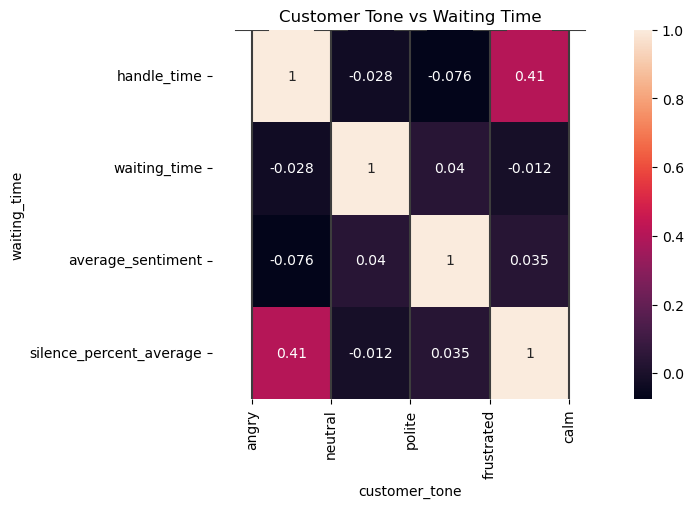

In [14]:
# Analyze correlation between sentiment and AHT/AST
sns.heatmap(calls_full[['handle_time', 'waiting_time', 'average_sentiment', 'silence_percent_average']].corr(), annot=True)

# Visualize relationship between sentiment and handle time
sns.boxplot(x='agent_tone', y='handle_time', data=calls_full)
plt.title('Agent Tone vs Handle Time')

sns.boxplot(x='customer_tone', y='waiting_time', data=calls_full)
plt.title('Customer Tone vs Waiting Time')


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract top phrases from call transcripts
vectorizer = CountVectorizer(stop_words='english', max_features=100)
transcript_matrix = vectorizer.fit_transform(calls_full['call_transcript'])

# Display common phrases
common_phrases = vectorizer.get_feature_names_out()
print("Common phrases in call transcripts:", common_phrases)


Common phrases in call transcripts: ['150' 'able' 'agent' 'ahead' 'airlines' 'alright' 'appreciate'
 'available' 'better' 'booked' 'booking' 'calling' 'change' 'check'
 'chicago' 'confirmation' 'credit' 'customer' 'date' 'day' 'delay'
 'delayed' 'delays' 'details' 'does' 'don' 'earlier' 'fare' 'fee' 'flight'
 'flights' 'flying' 'frustration' 'good' 'got' 'great' 'guess' 'happy'
 'help' 'hi' 'hope' 'hours' 'instead' 'issues' 'john' 'just' 'know' 'la'
 'leaving' 'let' 'like' 'll' 'look' 'looks' 'make' 'meeting' 'monday'
 'need' 'new' 'noises' 'number' 'okay' 'options' 'original' 'problem'
 'pull' 'really' 'reservation' 'rest' 'right' 'safe' 'san' 'schedule'
 'seats' 'service' 'sir' 'sound' 'sounds' 'sure' 'switch' 'thank' 'thanks'
 'time' 'today' 'travel' 'travels' 'trip' 'typing' 'umm' 'understand'
 'unfortunately' 'united' 've' 'voucher' 'way' 'wednesday' 'week'
 'welcome' 'work' 'yeah']


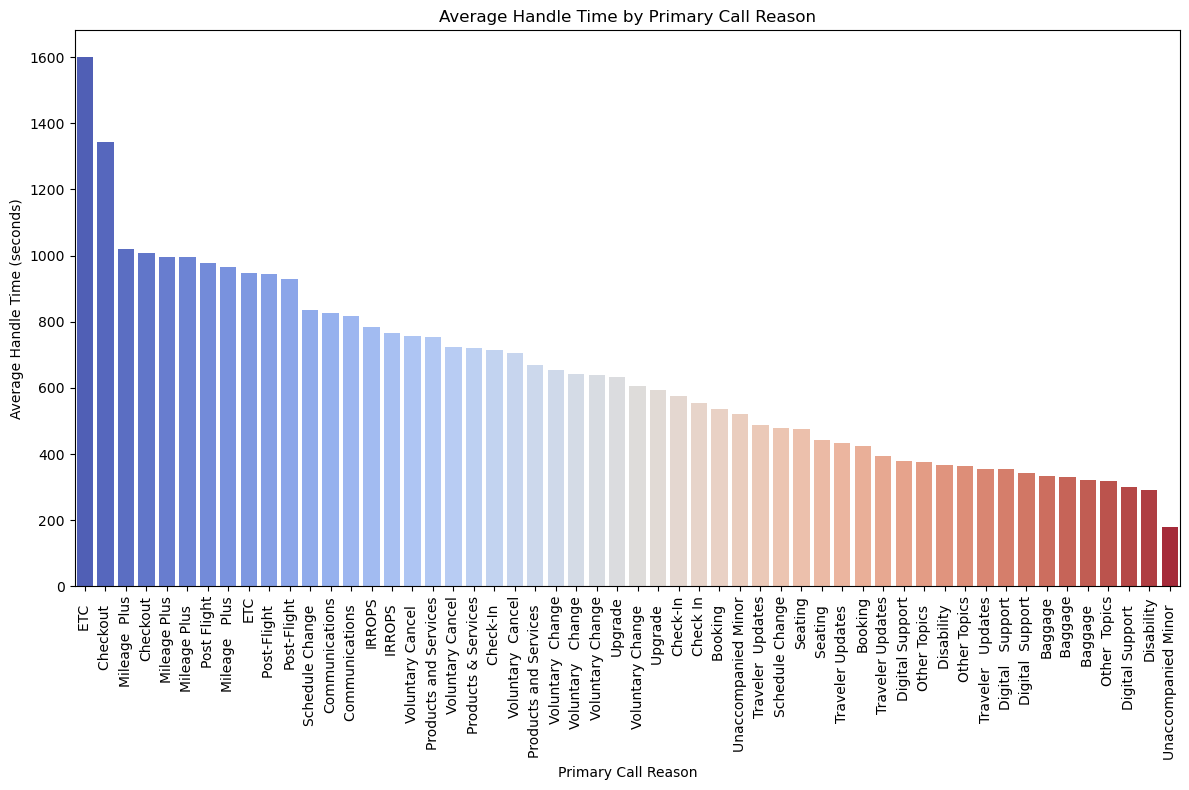

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of AHT by primary call reason
plt.figure(figsize=(12, 8))
sns.barplot(x=aht_by_reason.index, y=aht_by_reason.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Handle Time by Primary Call Reason')
plt.ylabel('Average Handle Time (seconds)')
plt.xlabel('Primary Call Reason')
plt.tight_layout()
plt.show()


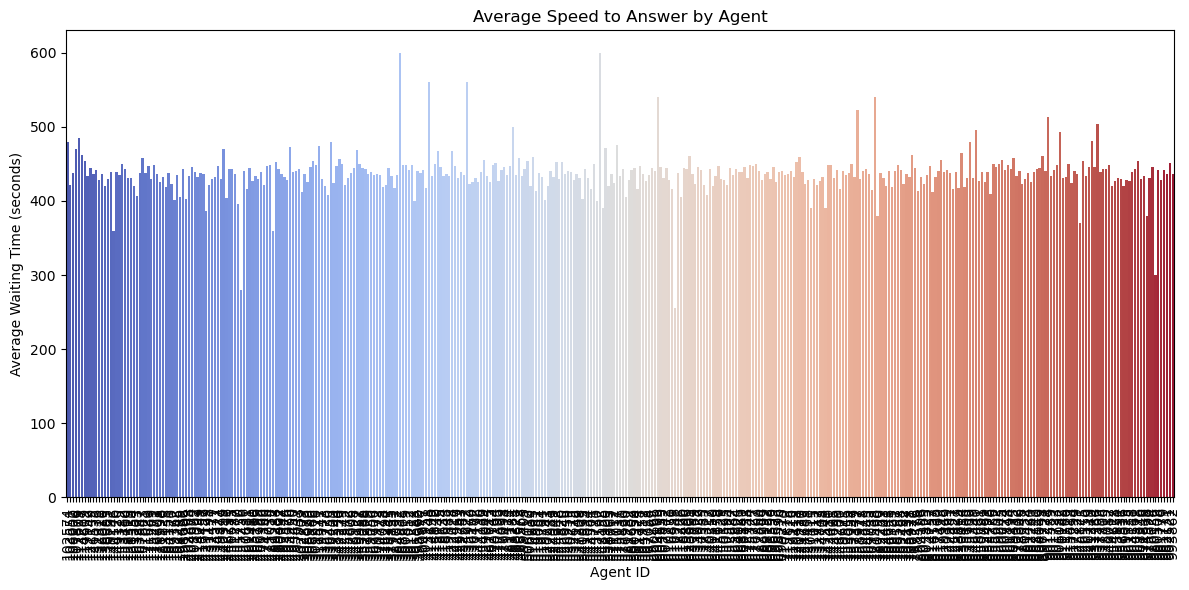

In [29]:
# Calculate Average Speed to Answer (AST)
calls_full['waiting_time'] = (calls_full['agent_assigned_datetime'] - calls_full['call_start_datetime']).dt.total_seconds()
ast_by_agent = calls_full.groupby('agent_id_x')['waiting_time'].mean().sort_values(ascending=False)

# Plot AST by agent
plt.figure(figsize=(12, 6))
sns.barplot(x=ast_by_agent.index, y=ast_by_agent.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Speed to Answer by Agent')
plt.ylabel('Average Waiting Time (seconds)')
plt.xlabel('Agent ID')
plt.tight_layout()
plt.show()


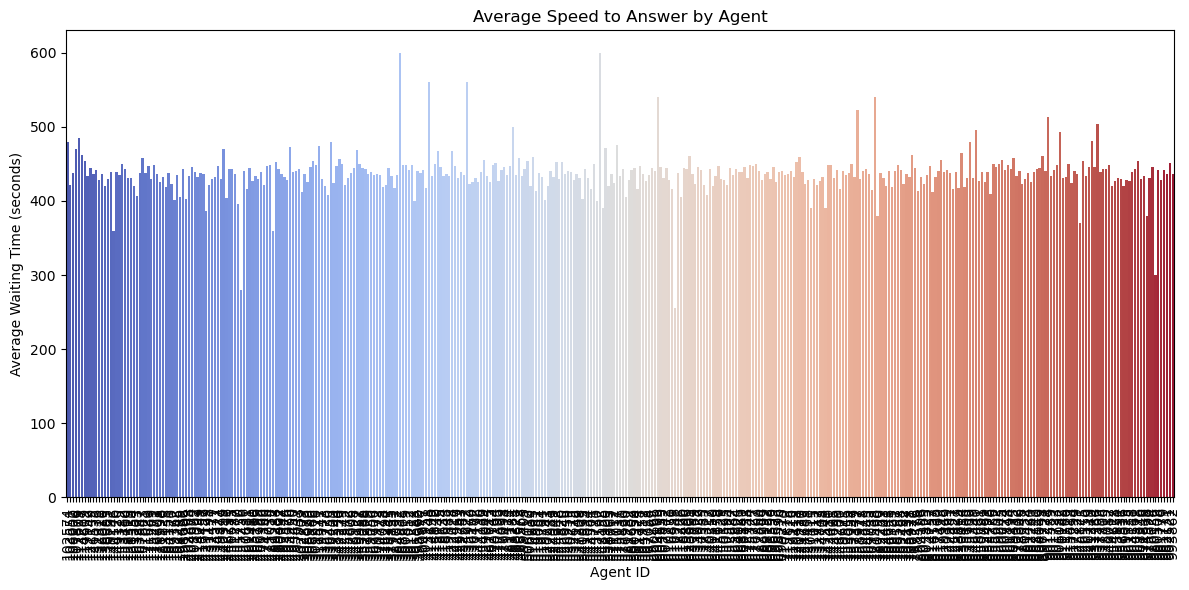

In [30]:
# Calculate Average Speed to Answer (AST)
calls_full['waiting_time'] = (calls_full['agent_assigned_datetime'] - calls_full['call_start_datetime']).dt.total_seconds()
ast_by_agent = calls_full.groupby('agent_id_y')['waiting_time'].mean().sort_values(ascending=False)

# Plot AST by agent
plt.figure(figsize=(12, 6))
sns.barplot(x=ast_by_agent.index, y=ast_by_agent.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Speed to Answer by Agent')
plt.ylabel('Average Waiting Time (seconds)')
plt.xlabel('Agent ID')
plt.tight_layout()
plt.show()


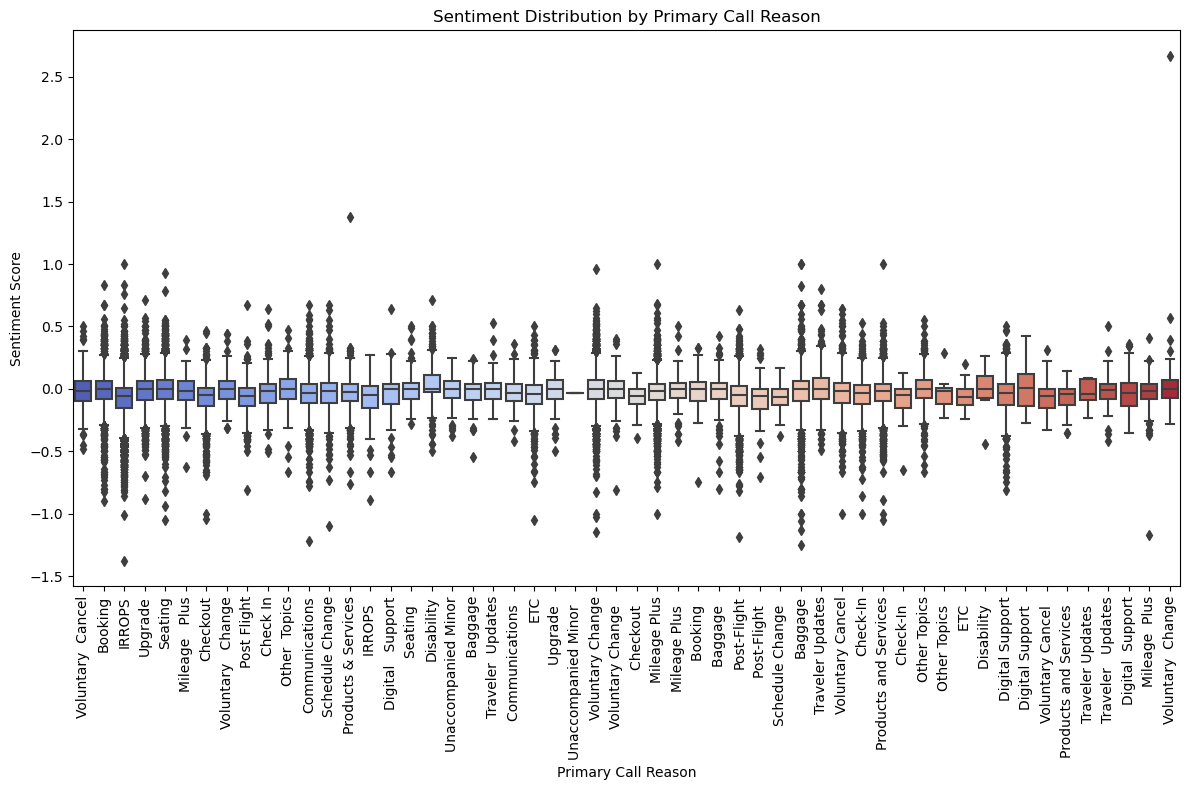

In [31]:
# Plot sentiment distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='primary_call_reason', y='average_sentiment', data=calls_full, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution by Primary Call Reason')
plt.ylabel('Sentiment Score')
plt.xlabel('Primary Call Reason')
plt.tight_layout()
plt.show()


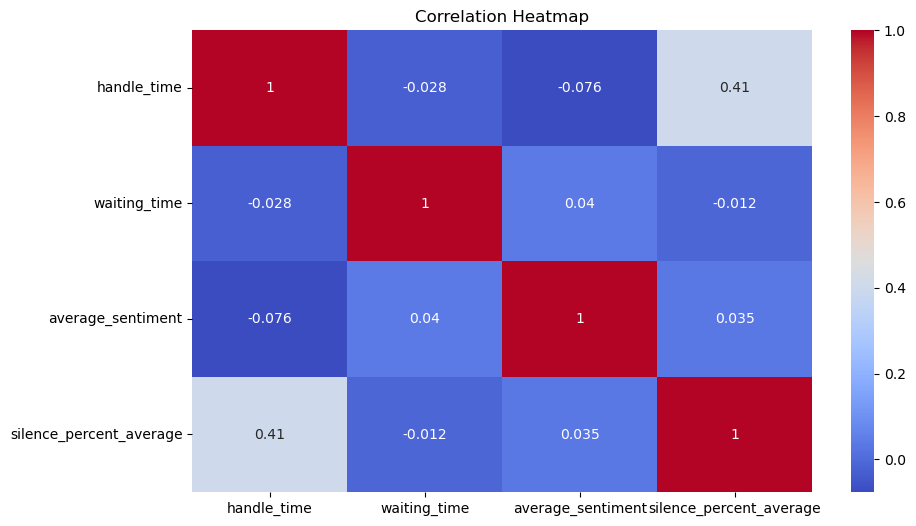

In [32]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = calls_full[['handle_time', 'waiting_time', 'average_sentiment', 'silence_percent_average']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


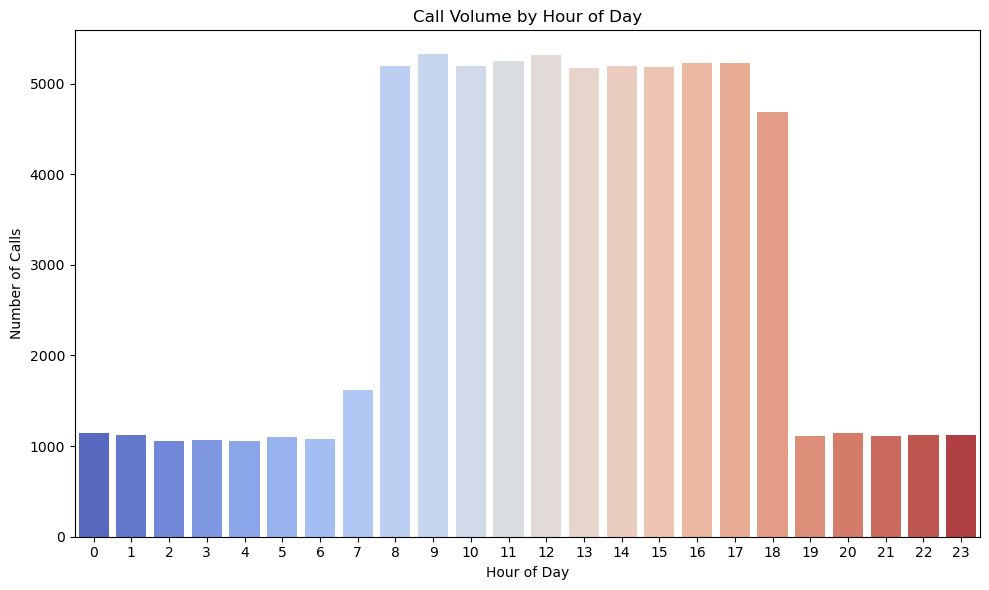

In [33]:
# Convert call_start_datetime to datetime if not already done
calls_full['call_start_datetime'] = pd.to_datetime(calls_full['call_start_datetime'])

# Plot call volume over time (e.g., by hour)
calls_full['hour'] = calls_full['call_start_datetime'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=calls_full, palette='coolwarm')
plt.title('Call Volume by Hour of Day')
plt.ylabel('Number of Calls')
plt.xlabel('Hour of Day')
plt.tight_layout()
plt.show()


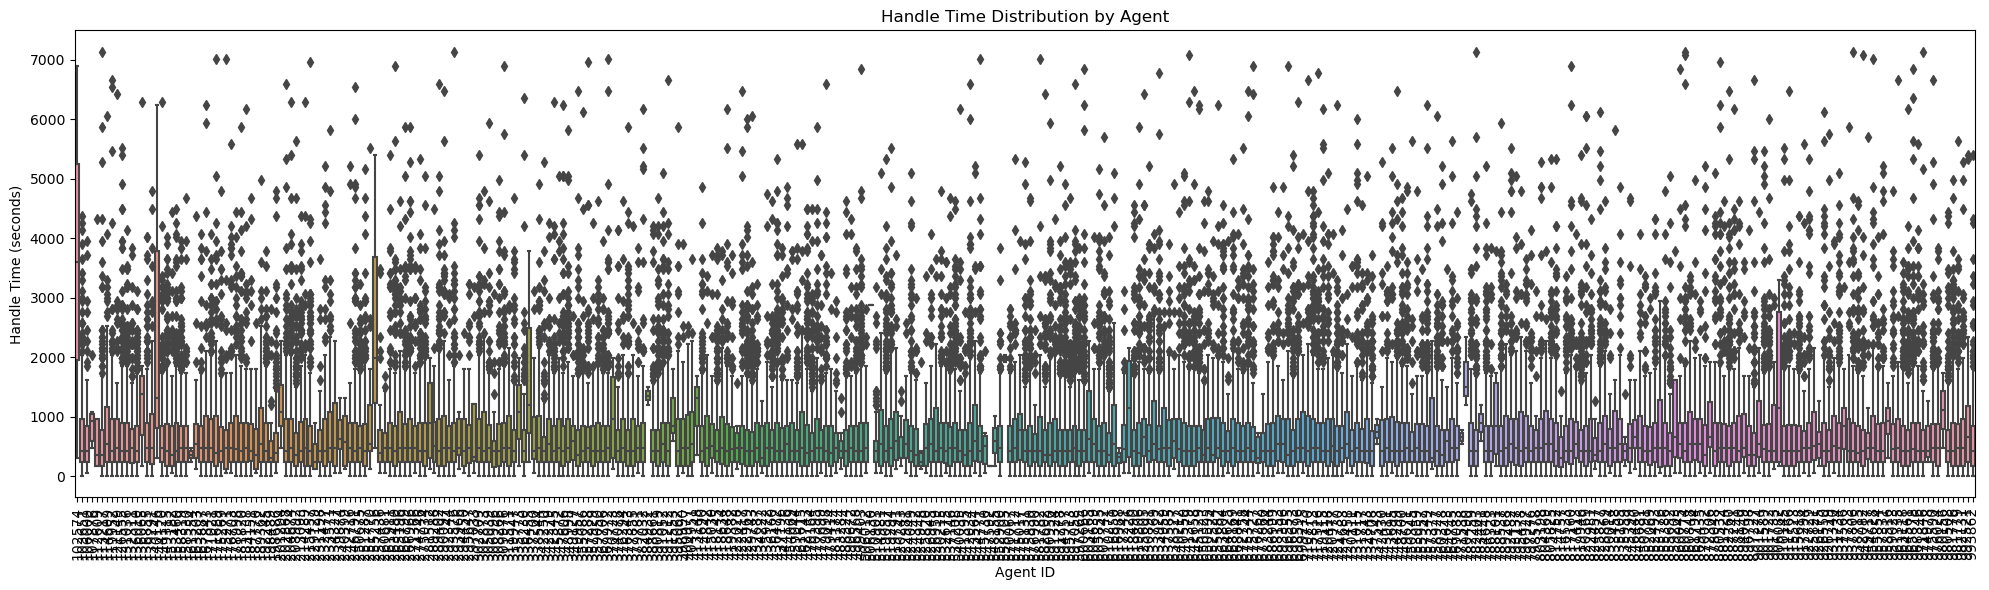

In [43]:
# Plot AHT distribution per agent
plt.figure(figsize=(20, 6))
sns.boxplot(x='agent_id_x', y='handle_time', data=calls_full)
plt.xticks(rotation=90)
plt.title('Handle Time Distribution by Agent')
plt.ylabel('Handle Time (seconds)')
plt.xlabel('Agent ID')
plt.tight_layout()
plt.show()

